In [15]:
import numpy as np
from numpy.random import seed
seed=0
import sys
np.random.seed(seed)
import os
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
from tqdm.notebook import tqdm
import pandas as pd
import langdetect
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import string
import spacy
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import tensorflow as tf
tf.random.set_seed(seed)
from bertopic import BERTopic

windows_os = True

if windows_os:
    base_path = "C:/Users"
else:
    base_path = r"/media/gianlucanogara/Windows/Users"

path_utils = base_path + "/gianluca.nogara/Desktop/Repo/Vaccines_Discussion_Italy/tweet_utils"
sys.path.append(path_utils)
import utils
base = base_path + "/gianluca.nogara/Desktop/Repo/Vaccines_Discussion_Italy/Italian"

ModuleNotFoundError: No module named 'opt_einsum'

In [5]:
path_files = r"C:\Users\gianluca.nogara\Desktop\Repo\Vaccines_Discussion_Italy\Italian\files\tweets"

In [7]:
df = pd.read_csv(r"C:\Users\gianluca.nogara\Downloads\left.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
                 # usecols=["user_screen_name", "text", "hashtags", "urls"])
df

,name,community,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text_x,...,SOCIAL,credibility_score,text_y,SEVERE_TOXICITY,LIKELY_TO_REJECT,INSULT,PROFANITY,THREAT,bot_score,trollscore
0,planetpaul65,0.0,1221739084449832960,1221739084449832960,Mon Jan 27 10:17:51 +0000 2020,241972508,planetpaul65,False,Sun Jan 23 16:31:07 +0000 2011,La Memoria è l’unico vaccino contro l’indiffer...,...,NaN,NaN,La Memoria è l’unico vaccino contro l’indiffer...,0.074654,0.121680,0.033265,0.263505,0.240654,0.800688,NaN
1,arual812,0.0,1221728980203724801,1221728980203724801,Mon Jan 27 09:37:42 +0000 2020,908731428124397568,arual812,False,Fri Sep 15 16:37:10 +0000 2017,"""Coltivare la Memoria è ancora oggi un vaccino...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660850,NaN
2,pvsassone,0.0,1221732930738905088,1221732930738905088,Mon Jan 27 09:53:24 +0000 2020,3194573930,pvsassone,False,Wed May 13 17:31:39 +0000 2015,Ma prima una premessa per chi non conosce la v...,...,NaN,NaN,Ma prima una premessa per chi non conosce la v...,0.065959,0.296371,0.269455,0.129770,0.031704,0.896387,NaN
3,DemosuMarte,0.0,1221732727680045057,1221732727680045057,Mon Jan 27 09:52:35 +0000 2020,2418439695,DemosuMarte,False,Mon Mar 17 20:52:48 +0000 2014,Exitpolll \n\n62% Bonaccini\n51% Borgonzoni\n1...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.346921,0.009441
4,BrunoCervesi,0.0,1221730179510304768,1221730179510304768,Mon Jan 27 09:42:28 +0000 2020,3021160966,BrunoCervesi,False,Fri Feb 06 06:57:47 +0000 2015,"""Coltivare la Memoria è ancora oggi un vaccino...",...,NaN,NaN,"""Coltivare la Memoria è ancora oggi un vaccino...",0.139455,0.070826,0.045925,0.121243,0.627971,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215008,LalliVincenzo,0.0,1394609394155937793,1394609394155937793,Tue May 18 11:02:44 +0000 2021,4540112892,LalliVincenzo,False,Sat Dec 12 18:38:55 +0000 2015,"Se ora l’Italia riparte, non è merito di chi v...",...,NaN,NaN,"Se ora l’Italia riparte, non è merito di chi v...",0.223427,0.371556,0.040187,0.071052,0.397130,0.782827,0.000030
1215009,walter63631215,0.0,1394609755528773633,1394609755528773633,Tue May 18 11:04:10 +0000 2021,985066288136548353,walter63631215,False,Sat Apr 14 08:04:39 +0000 2018,Quest’anno in Italia la scuola finirà nella pr...,...,NaN,NaN,Quest’anno in Italia la scuola finirà nella pr...,0.209409,0.015651,0.057087,0.092779,0.024421,0.660850,NaN
1215010,GustavoMichele6,0.0,1394609207543050240,1394609207543050240,Tue May 18 11:02:00 +0000 2021,1181563222853337088,GustavoMichele6,False,Tue Oct 08 13:33:33 +0000 2019,@elenaprimudaja @EnricoLetta Il vaccino ha i s...,...,0.0,0.94,elenaprimudaja EnricoLetta Il vaccino ha i suo...,0.263505,0.079098,0.078865,0.033648,0.020796,0.708983,0.007861
1215011,Dado46544020,0.0,1394609191118118914,1394609191118118914,Tue May 18 11:01:56 +0000 2021,1350765891261255680,Dado46544020,False,Sun Jan 17 11:24:36 +0000 2021,Il vaccino Covid deve essere considerato un be...,...,NaN,NaN,Il vaccino Covid deve essere considerato un be...,0.051378,0.283513,0.123096,0.074440,0.370398,NaN,NaN


In [9]:
df.rename(columns={"text_x":"text"}, inplace=True)

In [10]:
df.columns

Index(['name', 'community', 'id', 'id_str', 'created_at', 'user_id',
       'user_screen_name', 'user_verified', 'user_created_at', 'text',
       'source', 'coordinates', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'lang',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'rt_coordinates', 'rt_created_at',
       'rt_in_reply_to_status_id', 'rt_in_reply_to_user_id', 'rt_lang',
       'rt_favourite_count', 'rt_id', 'rt_user_id', 'rt_user_screen_name',
       'rt_user_created_at', 'rt_user_verified', 'rt_user_followers_count',
       'rt_user_friends_count', 'rt_user_favourites_count', 'quoted_status_id',
       'quoted_status_text', 'quoted_status_created_at', 'quoted_user_id',
       'quoted_user_created_at', 'hashtags', 'symbols', 'user_mentions',
       'urls', 'polls', 'media', 'user_tweets_count', 'user_friends_count',
       'user_follow

# EDA

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,1215013,67556,danieledv79,3012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
community,1215013.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id,1215013.0,NaN,NaN,NaN,1352452941643130112.0,36264833523248672.0,1212528611649085440.0,1343160247196770304.0,1363791028193533952.0,1373977309905031168.0,1396594017224347648.0
id_str,1215013.0,NaN,NaN,NaN,1352452941643130112.0,36264833523248672.0,1212528611649085440.0,1343160247196770304.0,1363791028193533952.0,1373977309905031168.0,1396594017224347648.0
created_at,1215013,1105971,Sat Dec 26 16:44:47 +0000 2020,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
INSULT,487031.0,NaN,NaN,NaN,0.238674,0.222001,0.0,0.058653,0.161136,0.356399,1.0
PROFANITY,487031.0,NaN,NaN,NaN,0.238164,0.220209,0.0,0.058465,0.163563,0.353421,1.0
THREAT,487031.0,NaN,NaN,NaN,0.238071,0.219547,0.0,0.06192,0.163701,0.35111,1.0
bot_score,999883.0,NaN,NaN,NaN,0.581853,0.201012,0.0,0.40674,0.620705,0.773346,1.0


In [12]:
txt = df["text"].iloc[0]
print(txt, " --> ", langdetect.detect(txt))

La Memoria è l’unico vaccino contro l’indifferenza.
(Liliana Segre)
#GiornatadellaMemoria2020 https://t.co/JDF9vdg1P9  -->  it


In [14]:
!python -m spacy download it_core_news_lg

[+] Download and installation successful
You can now load the package via spacy.load('it_core_news_lg')


2022-09-06 14:04:14.929129: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-06 14:04:14.929166: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-06 14:04:19.811759: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-06 14:04:19.812937: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-09-06 14:04:19.813857: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-09-06 14:04:19.814581: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [15]:
import it_core_news_lg
nlp = it_core_news_lg.load()
# word_count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))

print("checkpoint 1")
# stop_word_count
nlp = spacy.load("it_core_news_lg")
all_stop_words = nlp.Defaults.stop_words
df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in all_stop_words]))

# url_count
df['url_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

print("checkpoint 2")
# mean_word_length
df['mean_word_length'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# hashtag_count
df['hashtag_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df['mention_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

checkpoint 1
checkpoint 2


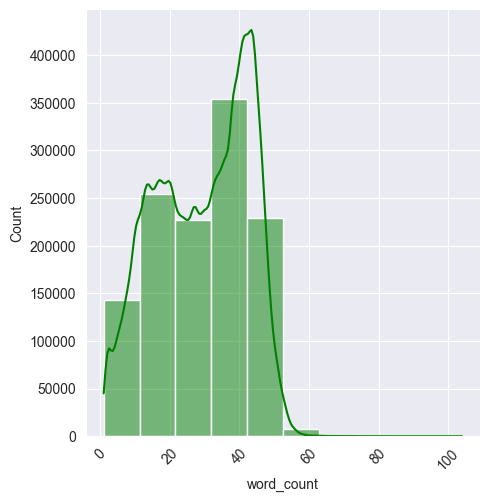

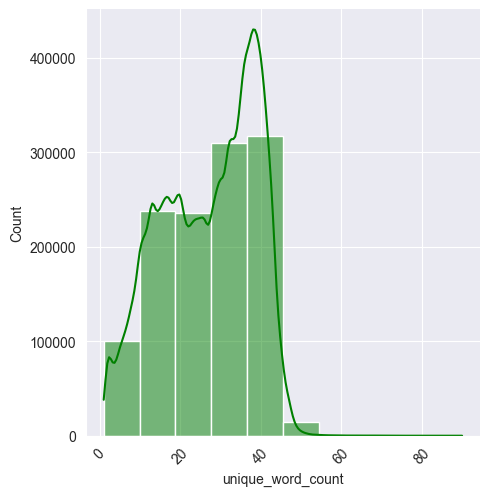

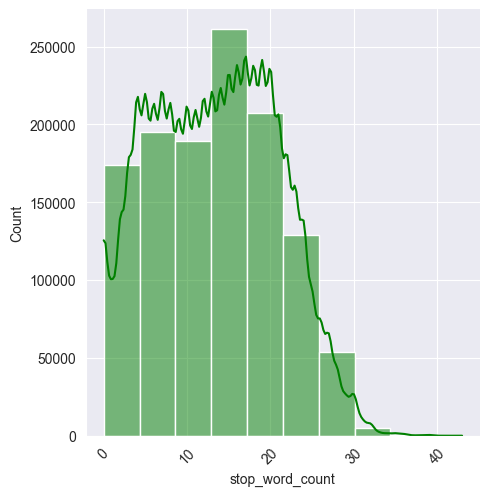

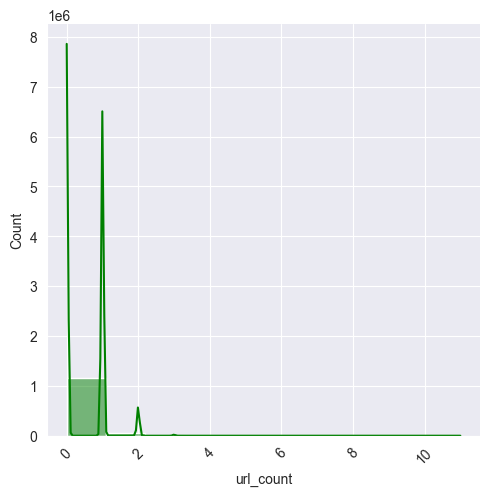

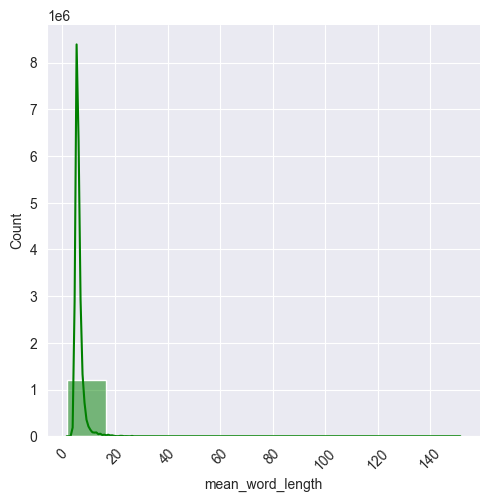

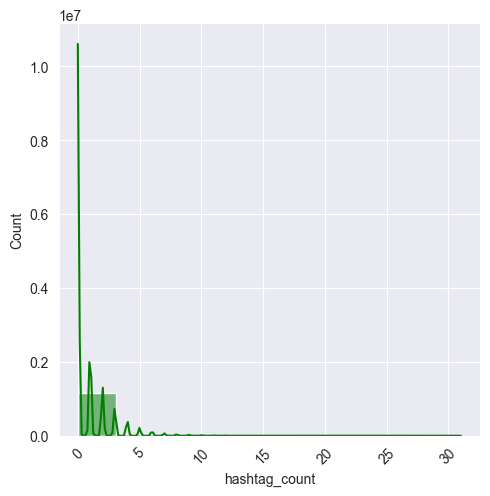

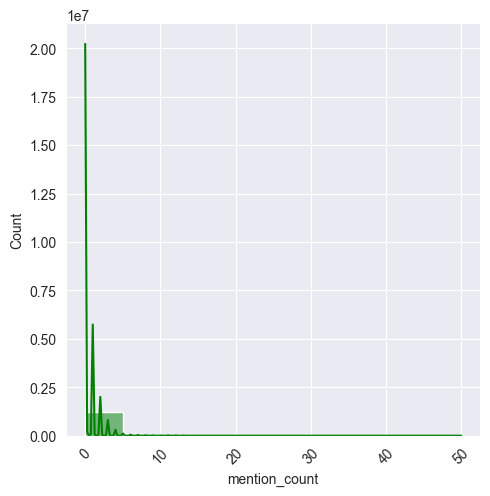

In [16]:
text_length = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                 'hashtag_count', 'mention_count']

for col in text_length:
    plt.rcParams["figure.figsize"] = (5,5)
    sns.displot(x=df[col], bins=10, color='green', kde=True)
    plt.xticks(rotation=45)
    plt.show()

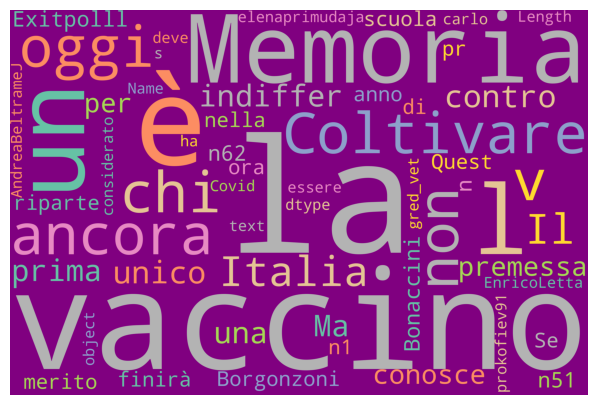

In [18]:
# Create stopword
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(width = 3000, height = 2000, random_state=0, background_color='purple', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(str(df.text))
# Display the generated image
plt.rcParams["figure.figsize"] = (10,5)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Text analysis

In [19]:
nlp = spacy.load("it_core_news_lg")

In [20]:
ner_lst = nlp.pipe_labels['ner']
print(len(ner_lst))
print(ner_lst)

4
['LOC', 'MISC', 'ORG', 'PER']


In [21]:
txt = df["text"].iloc[500]
doc_cleaned = nlp(txt)
print(txt)
print([(X.text, X.label_) for X in doc_cleaned.ents])
# Location, Person, Organization, Misc

@nicoterranova Esatto.. Perché non ci sono vaccini per curarla 😁
[('@nicoterranova Esatto..', 'MISC')]


In [22]:
print(f"{'text':{15}} {'NER':{10}} {'NER explained':{20}} ")
for ent in doc_cleaned.ents:
  print(f'{ent.text:{15}} {ent.label_:{10}} {spacy.explain(ent.label_):{20}}')

text            NER        NER explained        
@nicoterranova Esatto.. MISC       Miscellaneous entities, e.g. events, nationalities, products or works of art


In [23]:
tag_lst = nlp.pipe_labels['tagger']
print(len(tag_lst))
print(tag_lst)

48
['A', 'AP', 'B', 'BN', 'B_PC', 'CC', 'CS', 'DD', 'DE', 'DI', 'DQ', 'DR', 'E', 'E_RD', 'FB', 'FC', 'FF', 'FS', 'I', 'N', 'NO', 'PART', 'PC', 'PC_PC', 'PD', 'PE', 'PI', 'PP', 'PQ', 'PR', 'RD', 'RI', 'S', 'SP', 'SW', 'SYM', 'T', 'V', 'VA', 'VA_PC', 'VM', 'VM_PC', 'VM_PC_PC', 'V_B', 'V_PC', 'V_PC_PC', 'X', '_SP']


In [24]:
print(txt)
print([(X.text, X.pos_, X.tag_) for X in doc_cleaned])

@nicoterranova Esatto.. Perché non ci sono vaccini per curarla 😁
[('@nicoterranova', 'NOUN', 'S'), ('Esatto', 'PROPN', 'SP'), ('..', 'PUNCT', 'FS'), ('Perché', 'SCONJ', 'CS'), ('non', 'ADV', 'BN'), ('ci', 'PRON', 'PC'), ('sono', 'VERB', 'V'), ('vaccini', 'NOUN', 'S'), ('per', 'ADP', 'E'), ('curarla', 'VERB', 'V_PC'), ('😁', 'ADV', 'PC')]


In [25]:
print(f"{'text':{10}} {'POS':{10}} {'TAG':{10}} {'POS explained':{20}} {'tag explained'} ")
for token in doc_cleaned:
  print(f'{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.pos_):{20}} {spacy.explain(token.tag_)}')

text       POS        TAG        POS explained        tag explained 
@nicoterranova NOUN       S          noun                 None
Esatto     PROPN      SP         proper noun          space (English), sentence-final particle (Chinese)
..         PUNCT      FS         punctuation          None
Perché     SCONJ      CS         subordinating conjunction subordinating conjunction
non        ADV        BN         adverb               None
ci         PRON       PC         pronoun              None
sono       VERB       V          verb                 None
vaccini    NOUN       S          noun                 None
per        ADP        E          adposition           None
curarla    VERB       V_PC       verb                 None
😁          ADV        PC         adverb               None


In [26]:
#### PREPROCESSING ####
def lemmatizer(text):
    lem = []
    doc = nlp(text)
    for word in doc:
        lem.append(word.lemma_)
    return " ".join(lem)
def clean_text(text):
    # Normalize Text
    text = text.lower()
    # Remove Unicode Characters
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", '',text)
    # Remove Punctuaction
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove Stopwords
    all_stop_words = nlp.Defaults.stop_words
    text = " ".join([word for word in str(text).split() if word not in all_stop_words])
    # Lemmatization
    text = lemmatizer(text)
    text = re.sub(r'-PRON-', '',text)
    return text

In [27]:
df.head()

,name,community,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,...,THREAT,bot_score,trollscore,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,hashtag_count,mention_count
0,planetpaul65,0.0,1221739084449832960,1221739084449832960,Mon Jan 27 10:17:51 +0000 2020,241972508,planetpaul65,False,Sun Jan 23 16:31:07 +0000 2011,La Memoria è l’unico vaccino contro l’indiffer...,...,0.240654,0.800688,NaN,11,11,3,1,9.727273,1,0
1,arual812,0.0,1221728980203724801,1221728980203724801,Mon Jan 27 09:37:42 +0000 2020,908731428124397568,arual812,False,Fri Sep 15 16:37:10 +0000 2017,"""Coltivare la Memoria è ancora oggi un vaccino...",...,NaN,0.660850,NaN,43,37,25,1,5.976744,3,1
2,pvsassone,0.0,1221732930738905088,1221732930738905088,Mon Jan 27 09:53:24 +0000 2020,3194573930,pvsassone,False,Wed May 13 17:31:39 +0000 2015,Ma prima una premessa per chi non conosce la v...,...,0.031704,0.896387,NaN,40,35,18,0,5.450000,0,0
3,DemosuMarte,0.0,1221732727680045057,1221732727680045057,Mon Jan 27 09:52:35 +0000 2020,2418439695,DemosuMarte,False,Mon Mar 17 20:52:48 +0000 2014,Exitpolll \n\n62% Bonaccini\n51% Borgonzoni\n1...,...,NaN,0.346921,0.009441,18,18,1,0,6.777778,1,0
4,BrunoCervesi,0.0,1221730179510304768,1221730179510304768,Mon Jan 27 09:42:28 +0000 2020,3021160966,BrunoCervesi,False,Fri Feb 06 06:57:47 +0000 2015,"""Coltivare la Memoria è ancora oggi un vaccino...",...,0.627971,NaN,NaN,40,34,26,0,5.150000,1,0


In [ ]:
# df_clean = pd.read_csv(path_files + r"\df_NLP.csv", lineterminator="\n", low_memory=False, encoding="utf-8", usecols=["text","text_cleaned"])
# df_clean.head()
from tqdm.notebook import tqdm
value = []
for i in tqdm(df.text):
    value.append(clean_text(i))
value

In [20]:
df = df.merge(df_clean, how="left", on="text")
del df_clean
df

,user_screen_name,text,hashtags,urls,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,hashtag_count,mention_count,text_cleaned
0,MinervaMcGrani1,@lameduck1960 @Stefbazzi @MinervaMcGrani1 @Alb...,[],[],48,42,19,0,5.395833,0,4,stefbazzo albertobagnai c il mezzo sconfiggere...
1,MinervaMcGrani1,@lameduck1960 @Stefbazzi @MinervaMcGrani1 @Alb...,[],[],48,42,19,0,5.395833,0,4,stefbazzo albertobagnai c il mezzo sconfiggere...
2,TommyBrain,VociEstero:Papilloma Virus: il vaccino riduce ...,[],"[{'url': 'https://t.co/CrCpvJeSUI', 'expanded_...",12,11,3,1,7.583333,0,0,vociesteropapilloma virus vaccino ridurre davv...
3,TommyBrain,LuogoComune:Vacciniamoci contro le vaccinazion...,[],"[{'url': 'https://t.co/71xWW4bo5j', 'expanded_...",6,6,2,1,11.500000,0,0,Luogocomunevacciniamoci vaccinazione
4,MarySpes,"Lo scienziato: ""Da 1 a 3 anni per un #vaccino ...","[{'text': 'vaccino', 'indices': [52, 60]}, {'t...","[{'url': 'https://t.co/g0ZUYHRuiq', 'expanded_...",15,15,7,2,6.866667,2,0,scienziato vaccino coronavirus
...,...,...,...,...,...,...,...,...,...,...,...,...
2061057,lucabattanta,A #lariachetira c’è un MEDICO DI BASE che ha a...,"[{'text': 'lariachetira', 'indices': [14, 27]}]",[],47,41,27,0,4.595745,3,1,Lariachetira c medico base appendere cartello ...
2061058,lucabattanta,A #lariachetira c’è un MEDICO DI BASE che ha a...,"[{'text': 'lariachetira', 'indices': [14, 27]}]",[],47,41,27,0,4.595745,3,1,Lariachetira c medico base appendere cartello ...
2061059,lucabattanta,A #lariachetira c’è un MEDICO DI BASE che ha a...,"[{'text': 'lariachetira', 'indices': [14, 27]}]",[],47,41,27,0,4.595745,3,1,Lariachetira c medico base appendere cartello ...
2061060,lucabattanta,A #lariachetira c’è un MEDICO DI BASE che ha a...,"[{'text': 'lariachetira', 'indices': [14, 27]}]",[],47,41,27,0,4.595745,3,1,Lariachetira c medico base appendere cartello ...


In [21]:
df['text'][2000]

"Era il 28 settembre 2017 e l'onorevole Ivan Catalano presentava al Ministro della Sanità Lorenzin un' interrogazione in merito al vaccino esavalente Hinfanrix extra e alla morti in culla... naturalmente la Signora non ha mai risposto 👇 https://t.co/boCxPIUfYj"

In [22]:
df['text_cleaned'][2000]

'settembre lonorevole ivan catalano presentare sanit lorenzin interrogazione merito vaccino esavalente hinfanrix extra morire cullare naturalmente signore rispondere'

# N-Grams

In [23]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,1),                      # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})',  # num chars >= 5
                          min_df=2).fit(corpus)                   # minimum required occurences of a word
    bag_of_words = vec.transform(corpus)
    print("checkpoint 1")
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    print("checkpoint 2")
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    print("checkpoint 3")
    return words_freq[:n]

In [24]:
common_words = get_top_n_words(df["text_cleaned"].astype('U').values, 20)

checkpoint 1
checkpoint 2
checkpoint 3


In [25]:
common_words

[('vaccino', 1469934),
 ('vaccinare', 258469),
 ('covid', 252364),
 ('vaccinazione', 240338),
 ('perch', 190794),
 ('morire', 184278),
 ('volere', 167391),
 ('dovere', 144174),
 ('medico', 132750),
 ('morto', 125692),
 ('pfizer', 124489),
 ('sapere', 118107),
 ('potere', 117041),
 ('astrazeneca', 116209),
 ('effetto', 89365),
 ('virus', 88533),
 ('sanitario', 83398),
 ('reazione', 76446),
 ('sperimentale', 76027),
 ('obbligatorio', 75686)]

In [26]:
df_uni = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

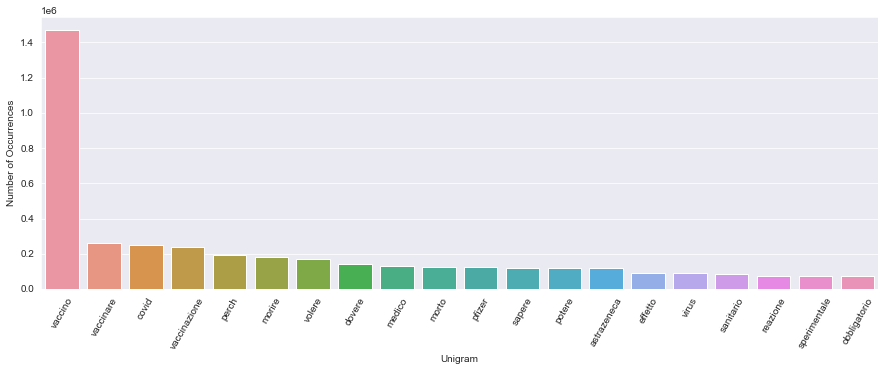

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_uni['unigram'], y=df_uni['count'])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Unigram', fontsize=10)
plt.xticks(rotation=60)
plt.show()

In [28]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2),                      # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})',  # num chars >= 5
                          min_df=2).fit(corpus)                   # minimum required occurences of a word
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [29]:
common_words = get_top_n_words(df["text_cleaned"].astype('U').values, 20)
df_bi = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

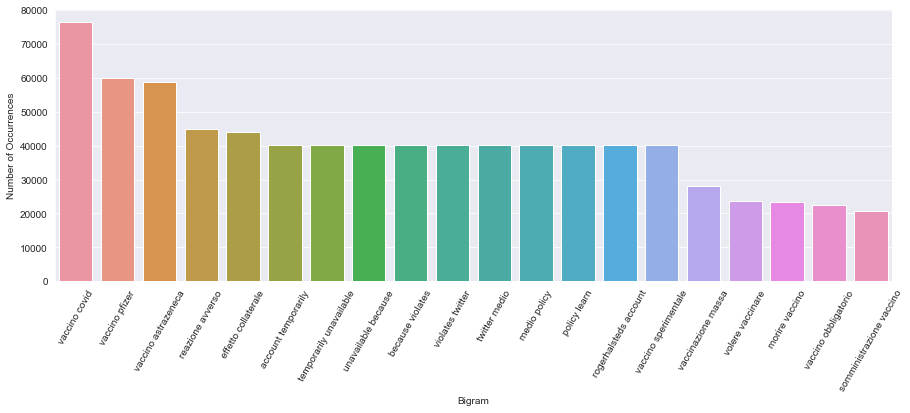

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_bi['bigram'], y=df_bi['count'])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Bigram', fontsize=10)
plt.xticks(rotation=60)
plt.show()

In [31]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3),                     # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})', # num chars >= 5
                          min_df=2).fit(corpus)                  # minimum required occurences of a word
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [32]:
common_words = get_top_n_words(df["text_cleaned"].astype('U').values, 20)
df_tri = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

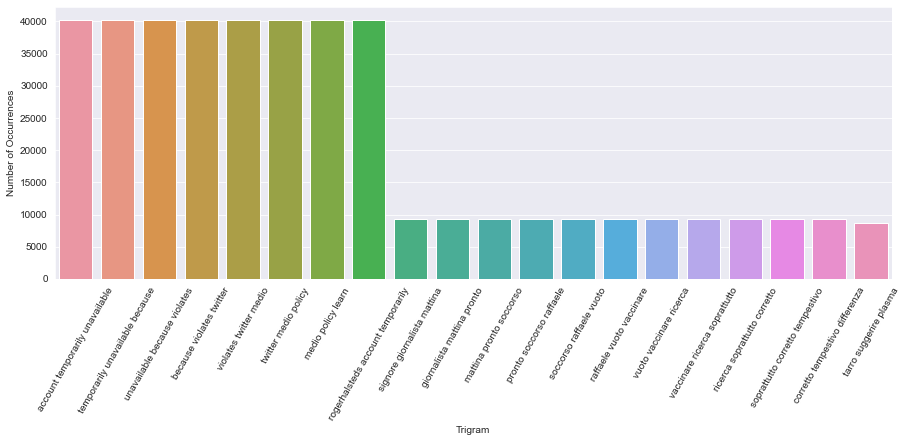

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_tri['trigram'], y=df_tri['count'])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Trigram', fontsize=10)
plt.xticks(rotation=60)
plt.show()

# Topic with BertTopic

In [34]:
tfidf = TfidfVectorizer(ngram_range=(1,1),                       # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})', # num chars >= 5
                          min_df=2).fit(df["text_cleaned"].astype('U').values)    # minimum required occurences of a word

In [35]:
model = BERTopic(nr_topics=10,
    vectorizer_model=tfidf,
    calculate_probabilities=False,
    verbose=True)
topics, probs = model.fit_transform(df["text_cleaned"].astype('U').values)

Exception ignored in: <generator object iter_fields at 0x00000263AB6E7C10>
Traceback (most recent call last):
  File "C:\Users\gianluca.nogara\Anaconda3\envs\Project\lib\ast.py", line 218, in iter_fields
    except AttributeError:
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
freq = model.get_topic_info()
freq.head()

In [ ]:
model.get_topic(4)

In [ ]:
model.visualize_barchart()

In [ ]:
tfidf_2 = TfidfVectorizer(ngram_range=(2,2),                      # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})',  # num chars >= 5
                          min_df=2).fit(df['text_cleaned'])     # minimum required occurences of a word

In [ ]:
model_2 = BERTopic(nr_topics=10,
    vectorizer_model=tfidf_2,
    calculate_probabilities=True,
    verbose=True)
topics, probs = model_2.fit_transform(df['text_cleaned'])

In [ ]:
freq = model_2.get_topic_info()
freq.head(10)

In [ ]:
model_2.get_topic(4)

In [ ]:
model_2.visualize_barchart()

In [ ]:
tfidf_3 = TfidfVectorizer(ngram_range=(1,3),                      # n_gram_type
                          token_pattern = r'([a-zA-Z0-9-/]{4,})', # num chars >= 4
                          min_df=2).fit(df['text_cleaned'])     # minimum required occurences of a word

In [ ]:
model_3 = BERTopic(nr_topics=10,
    vectorizer_model=tfidf_3,
    calculate_probabilities=True,
    verbose=True)
topics, probs = model_3.fit_transform(df['text_cleaned'])

In [ ]:
freq = model_3.get_topic_info()
freq.head(10)

In [ ]:
model_3.get_topic(4)

In [ ]:
model_3.visualize_barchart()

# Word embedding

In [ ]:
def tokenize(sentence):
  sentence = str(sentence).replace("\n", " ")
  token = nlp(sentence)
  tokens = [w.text for w in token]
  # remove short tokens
  tokens = [t for t in tokens if len(t) > 4]
  return tokens

In [ ]:
data = df['text_cleaned'].apply(tokenize)
def vocabulary(doc):
    corpus = []
    for word in doc:
        corpus.append(word)
    return corpus

In [ ]:
corpus = vocabulary(data)

In [ ]:
def similar(model, word):
    return model.wv.most_similar(word)

def embedding(model, word):
    return model.wv[word]

def similarity(model, word1, word2):
    return model.wv.similarity(word1, word2)

# CBOW

In [ ]:
# Create CBOW model
model_cbow = Word2Vec(corpus, min_count = 50)

In [ ]:
print(model_cbow)

In [ ]:
# summarize vocabulary
words = list(model_cbow.wv.key_to_index)
print(words)

In [ ]:
similar(model_cbow, 'vaccino')

In [ ]:
embedding(model_cbow, 'vaccino')

In [ ]:
similarity(model_cbow, 'vaccino', "pericoloso")

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:

        tokens.append(model.wv[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
tsne_plot(model_cbow)

# Skip Gram

In [ ]:
# Create Skip Gram model
model_sg = Word2Vec(corpus, min_count = 50, sg = 1)

In [ ]:
print(model_sg)

In [ ]:
# summarize vocabulary
words = list(model_sg.wv.key_to_index)
print(words)

In [ ]:
similar(model_sg, 'vaccino')

In [ ]:
embedding(model_sg, 'vaccino')

In [ ]:
similarity(model_sg, 'vaccino', "pericoloso")

In [ ]:
tsne_plot(model_sg)

https://machinelearningknowledge.ai/word2vec-in-gensim-explained-for-creating-word-embedding-models-pretrained-and-custom/